In [1]:
# Parameters
PHENOPLIER_NOTEBOOK_FILEPATH <- "projects/asthma-copd/nbs/15_twas/10-twas-qqplot.ipynb"

# Description

It takes TWAS results and verifies that the QQ-plots look fine (without inflation).

# Modules

In [2]:
library(tidyverse)

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
library(qqman)



For example usage please run: vignette('qqman')



Citation appreciated but not required:

Turner, (2018). qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. Journal of Open Source Software, 3(25), 731, https://doi.org/10.21105/joss.00731.





# Paths

In [4]:
BASE_DIR <- Sys.getenv("PHENOPLIER_PROJECTS_ASTHMA_COPD_RESULTS_DIR")

In [5]:
BASE_DIR

[1] "/opt/data/projects/asthma-copd/results"

In [6]:
SPREDIXCAN_DIR <- file.path(BASE_DIR, "twas", "spredixcan")

In [7]:
SPREDIXCAN_DIR

[1] "/opt/data/projects/asthma-copd/results/twas/spredixcan"

In [8]:
SMULTIXCAN_DIR <- file.path(BASE_DIR, "twas", "smultixcan")

In [9]:
SMULTIXCAN_DIR

[1] "/opt/data/projects/asthma-copd/results/twas/smultixcan"

# Asthma only

In [10]:
gwas_title <- "Asthma only (imputed)"

## S-PrediXcan

### Load data

In [11]:
twas <- as.data.frame(read_csv(file.path(SPREDIXCAN_DIR, "GWAS_Asthma_only_GLM_SNPs_info0.7-gtex_v8-mashr-Whole_Blood.csv")))

Rows: 12187 Columns: 14
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): gene, gene_name
dbl (8): zscore, pvalue, var_g, n_snps_used, n_snps_in_cov, n_snps_in_model,...
lgl (4): effect_size, pred_perf_r2, pred_perf_pval, pred_perf_qval

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [12]:
dim(twas)

[1] 12187    14

In [13]:
head(twas)

,gene,gene_name,zscore,effect_size,pvalue,var_g,pred_perf_r2,pred_perf_pval,pred_perf_qval,n_snps_used,n_snps_in_cov,n_snps_in_model,best_gwas_p,largest_weight
,<chr>,<chr>,<dbl>,<lgl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000179344.16,HLA-DQB1,-12.301224,NA,8.921179e-35,0.283759131,NA,NA,NA,3,3,3,4.004190e-34,0.77233233
2,ENSG00000232629.8,HLA-DQB2,11.907670,NA,1.079511e-32,1.363601315,NA,NA,NA,2,3,3,1.761500e-32,0.97203257
3,ENSG00000237541.3,HLA-DQA2,10.481759,NA,1.047767e-25,0.118802786,NA,NA,NA,2,4,4,4.049999e-21,0.48657435
4,ENSG00000161405.16,IKZF3,-9.524108,NA,1.664654e-21,0.002610898,NA,NA,NA,1,1,1,1.664654e-21,0.07394038
5,ENSG00000073605.18,GSDMB,8.267584,NA,1.367011e-16,0.098071716,NA,NA,NA,3,3,3,5.762121e-21,0.33883423
6,ENSG00000172057.9,ORMDL3,7.826190,NA,5.028774e-15,0.137414366,NA,NA,NA,2,2,2,1.070319e-18,0.39775212


### QQ-plot

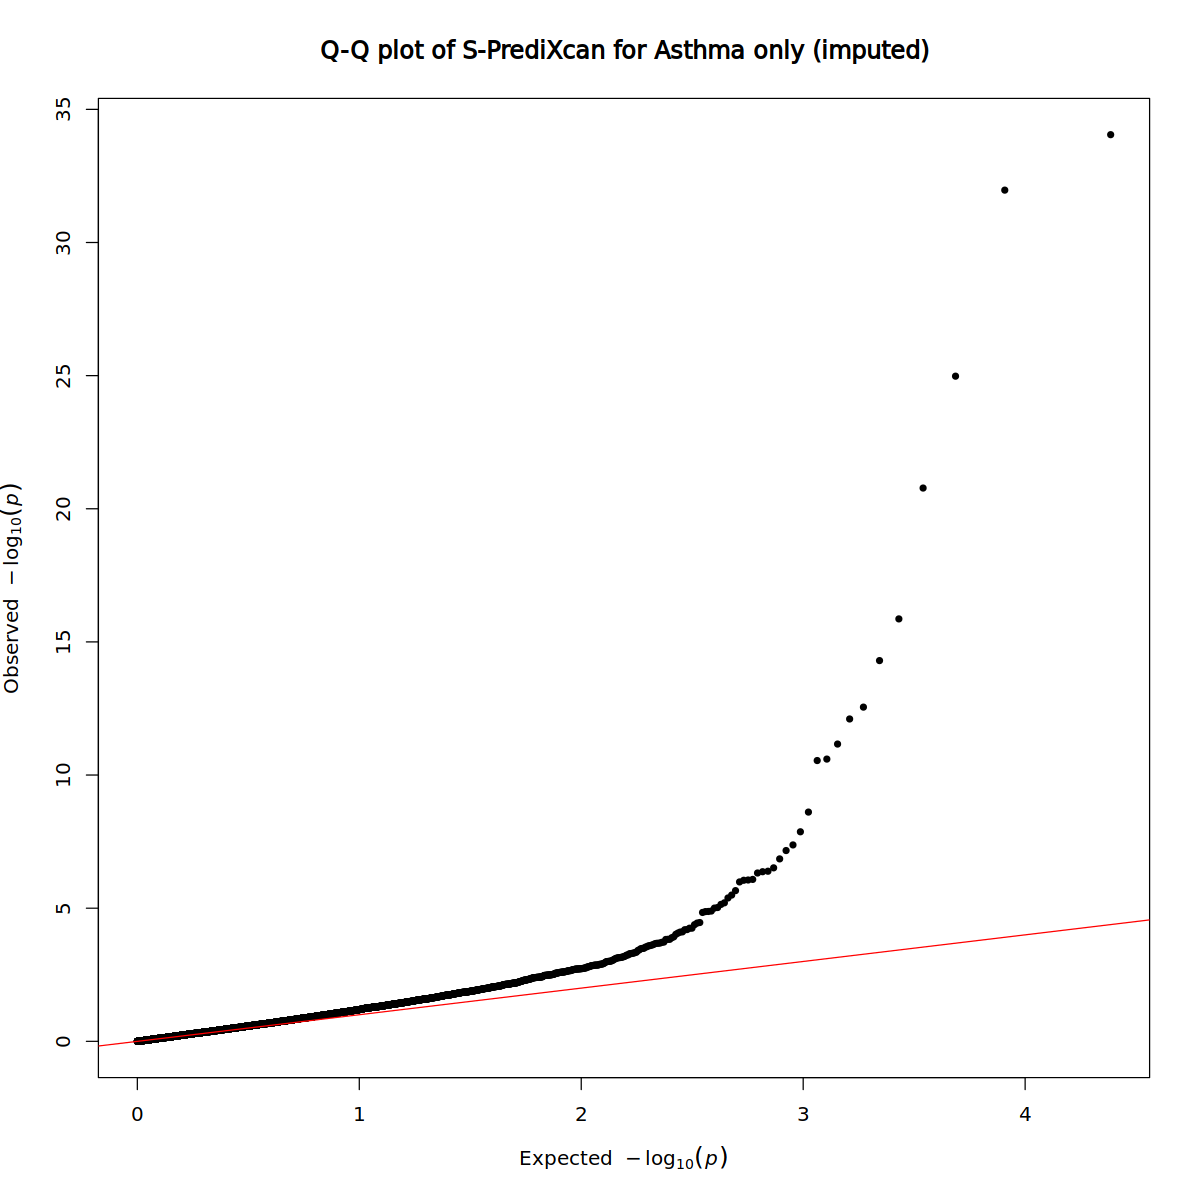

In [14]:
options(repr.plot.width = 10, repr.plot.height = 10)

qq(twas$pvalue, main = paste0("Q-Q plot of S-PrediXcan for ", gwas_title))

## S-MultiXcan

### Load data

In [15]:
twas <- as.data.frame(read_table(file.path(SMULTIXCAN_DIR, "GWAS_Asthma_only_GLM_SNPs_info0.7-gtex_v8-mashr-smultixcan.txt")))


── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  gene = col_character(),
  gene_name = col_character(),
  pvalue = col_double(),
  n = col_double(),
  n_indep = col_double(),
  p_i_best = col_double(),
  t_i_best = col_character(),
  p_i_worst = col_double(),
  t_i_worst = col_character(),
  eigen_max = col_double(),
  eigen_min = col_double(),
  eigen_min_kept = col_double(),
  z_min = col_double(),
  z_max = col_double(),
  z_mean = col_double(),
  z_sd = col_double(),
  tmi = col_double(),
  status = col_double()
)



In [16]:
dim(twas)

[1] 22314    18

In [17]:
head(twas)

,gene,gene_name,pvalue,n,n_indep,p_i_best,t_i_best,p_i_worst,t_i_worst,eigen_max,eigen_min,eigen_min_kept,z_min,z_max,z_mean,z_sd,tmi,status
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000196735.11,HLA-DQA1,7.348761e-41,44,6,9.592643e-43,Adipose_Subcutaneous,1.609915e-01,Liver,28.204735,2.729601e-15,0.9619905,-13.704118,4.770396,-8.595632,4.503510,6,0
2,ENSG00000204290.10,BTNL2,1.946528e-35,21,10,9.033026e-34,Brain_Cerebellum,9.478300e-01,Spleen,6.638123,3.961112e-17,0.2530003,-12.112823,9.268516,-1.785955,5.342915,10,0
3,ENSG00000204287.13,HLA-DRA,1.368742e-34,31,6,3.519801e-16,Liver,2.968206e-01,Uterus,13.206309,1.090915e-15,0.8755279,-8.154035,5.484352,-2.356741,4.415696,6,0
4,ENSG00000237541.3,HLA-DQA2,1.435612e-33,45,5,1.423904e-43,Adipose_Visceral_Omentum,6.029583e-05,Kidney_Cortex,29.469983,2.851292e-15,1.1347679,4.011650,13.841901,9.785267,1.782440,5,0
5,ENSG00000179344.16,HLA-DQB1,5.862907e-33,49,3,6.301083e-36,Adipose_Visceral_Omentum,1.061761e-03,Cells_Cultured_fibroblasts,43.187142,4.265176e-15,1.4925449,-12.513469,-3.273628,-10.685931,1.933292,3,0
6,ENSG00000232629.8,HLA-DQB2,9.179742e-31,41,3,4.004190e-34,Brain_Frontal_Cortex_BA9,1.555482e-01,Skin_Sun_Exposed_Lower_leg,31.641709,3.098713e-15,2.4323223,-1.420204,12.179358,9.984867,2.771756,3,0


### QQ-plot

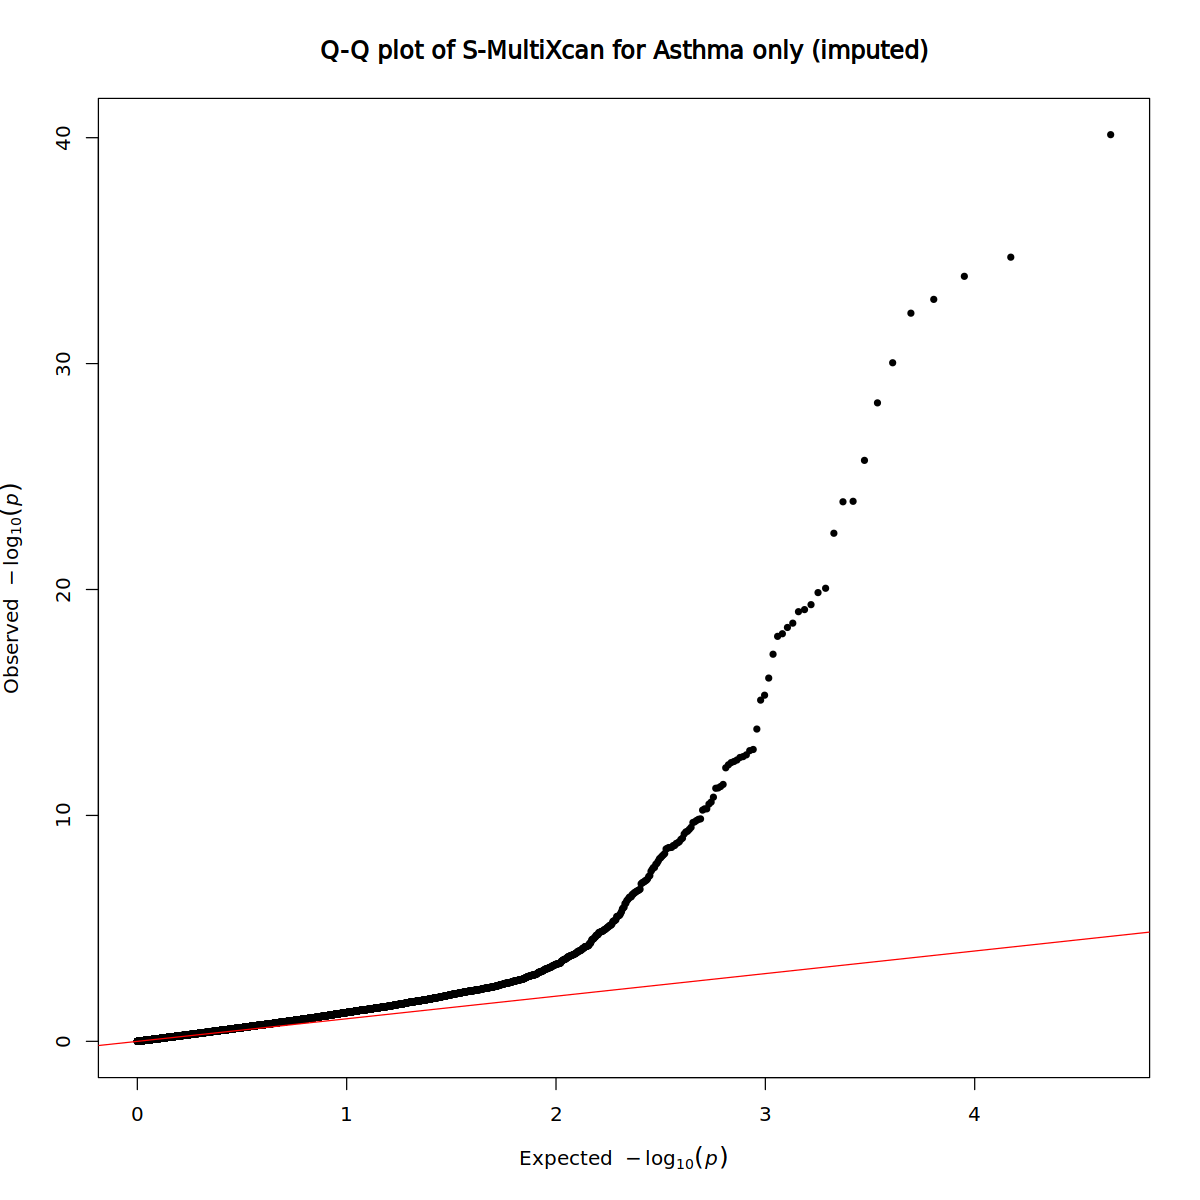

In [18]:
options(repr.plot.width = 10, repr.plot.height = 10)

qq(twas$pvalue, main = paste0("Q-Q plot of S-MultiXcan for ", gwas_title))

# COPD only

In [19]:
gwas_title <- "COPD only (imputed)"

## S-PrediXcan

### Load data

In [20]:
twas <- as.data.frame(read_csv(file.path(SPREDIXCAN_DIR, "GWAS_COPD_only_GLM_SNPs_info0.7-gtex_v8-mashr-Whole_Blood.csv")))

Rows: 12197 Columns: 14
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): gene, gene_name
dbl (8): zscore, pvalue, var_g, n_snps_used, n_snps_in_cov, n_snps_in_model,...
lgl (4): effect_size, pred_perf_r2, pred_perf_pval, pred_perf_qval

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [21]:
dim(twas)

[1] 12197    14

In [22]:
head(twas)

,gene,gene_name,zscore,effect_size,pvalue,var_g,pred_perf_r2,pred_perf_pval,pred_perf_qval,n_snps_used,n_snps_in_cov,n_snps_in_model,best_gwas_p,largest_weight
,<chr>,<chr>,<dbl>,<lgl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000188266.13,HYKK,-7.977829,NA,1.489290e-15,0.002663041,NA,NA,NA,1,1,1,1.489290e-15,0.07687678
2,ENSG00000041357.15,PSMA4,7.580813,NA,3.433968e-14,0.006042843,NA,NA,NA,3,3,3,1.884797e-15,0.16117561
3,ENSG00000183049.12,CAMK1D,6.846095,NA,7.589322e-12,0.059838781,NA,NA,NA,2,2,2,2.814849e-11,0.27717279
4,ENSG00000165609.12,NUDT5,5.826954,NA,5.644804e-09,0.005000704,NA,NA,NA,1,1,1,5.644804e-09,0.10294340
5,ENSG00000198624.12,CCDC69,-5.352389,NA,8.680055e-08,0.028808092,NA,NA,NA,4,4,4,1.032419e-07,0.17067329
6,ENSG00000135074.15,ADAM19,5.149474,NA,2.612179e-07,0.019394628,NA,NA,NA,3,3,3,2.718047e-07,0.15259514


### QQ-plot

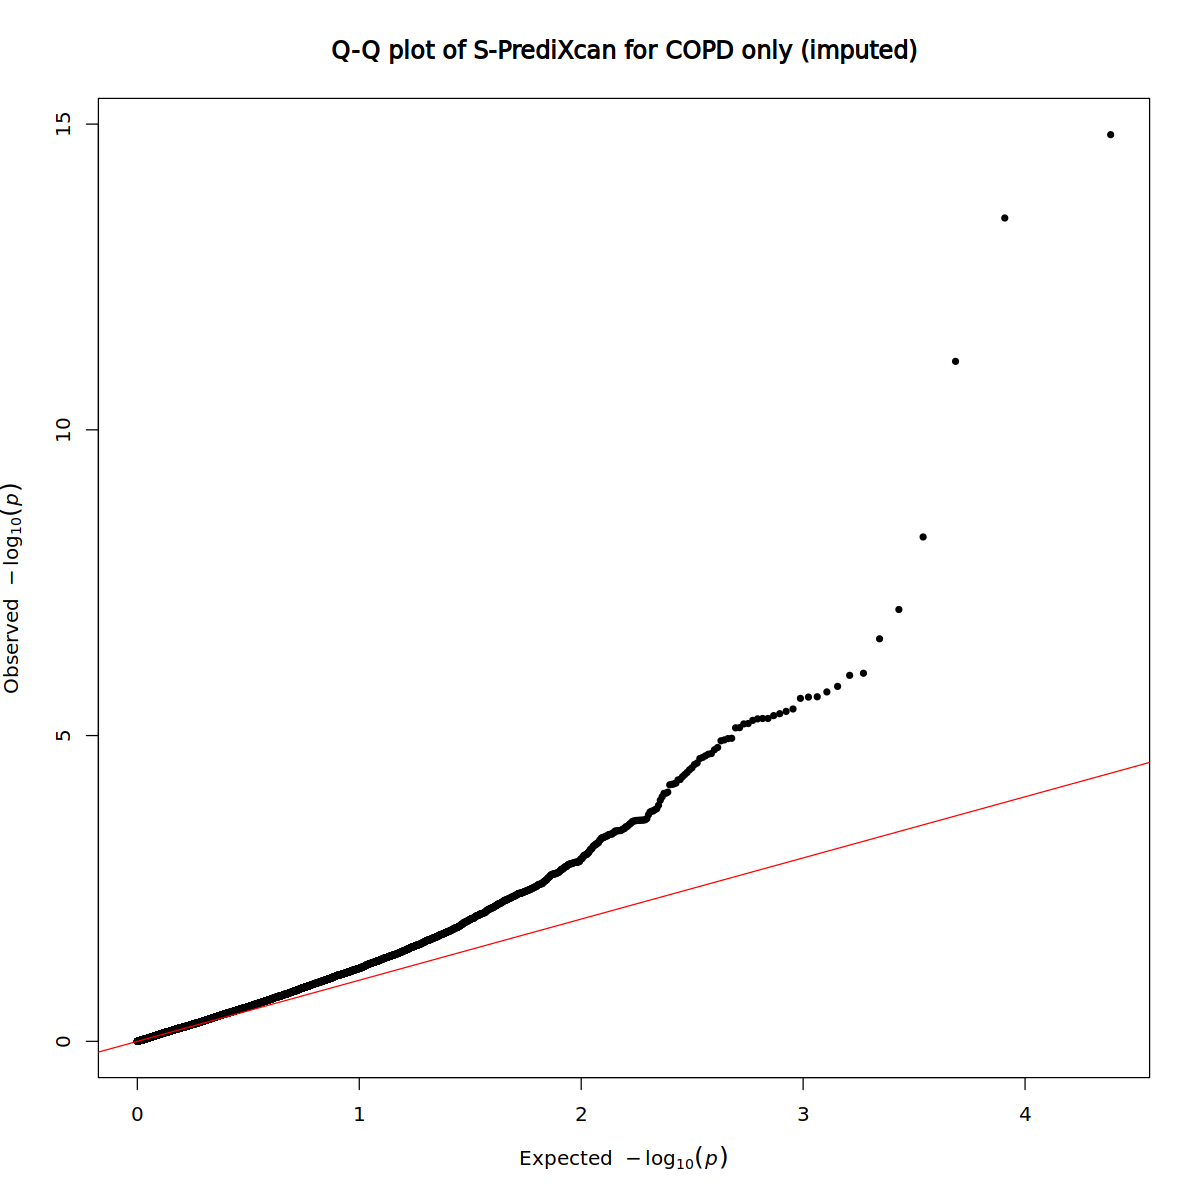

In [23]:
options(repr.plot.width = 10, repr.plot.height = 10)

qq(twas$pvalue, main = paste0("Q-Q plot of S-PrediXcan for ", gwas_title))

## S-MultiXcan

### Load data

In [24]:
twas <- as.data.frame(read_table(file.path(SMULTIXCAN_DIR, "GWAS_COPD_only_GLM_SNPs_info0.7-gtex_v8-mashr-smultixcan.txt")))


── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  gene = col_character(),
  gene_name = col_character(),
  pvalue = col_double(),
  n = col_double(),
  n_indep = col_double(),
  p_i_best = col_double(),
  t_i_best = col_character(),
  p_i_worst = col_double(),
  t_i_worst = col_character(),
  eigen_max = col_double(),
  eigen_min = col_double(),
  eigen_min_kept = col_double(),
  z_min = col_double(),
  z_max = col_double(),
  z_mean = col_double(),
  z_sd = col_double(),
  tmi = col_double(),
  status = col_double()
)



In [25]:
dim(twas)

[1] 22329    18

In [26]:
head(twas)

,gene,gene_name,pvalue,n,n_indep,p_i_best,t_i_best,p_i_worst,t_i_worst,eigen_max,eigen_min,eigen_min_kept,z_min,z_max,z_mean,z_sd,tmi,status
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000041357.15,PSMA4,1.536671e-22,49,4,3.091840e-18,Brain_Hypothalamus,0.9619185,Skin_Not_Sun_Exposed_Suprapubic,35.84134,1.065043e-15,1.2682287,-8.038637,8.7080364,2.77421795,3.471912,4,0
2,ENSG00000168743.12,NPNT,1.710790e-22,49,5,2.520164e-25,Adipose_Visceral_Omentum,0.7604612,Esophagus_Muscularis,21.85090,9.655151e-16,1.0609712,-10.398443,4.7210526,-3.56596683,4.670617,5,0
3,ENSG00000080644.15,CHRNA3,2.757816e-21,19,4,3.864274e-19,Esophagus_Gastroesophageal_Junction,0.2264615,Testis,10.49051,1.805447e-17,0.5072113,-8.940782,7.9233007,-4.65672015,4.678252,4,0
4,ENSG00000169684.13,CHRNA5,1.915449e-20,46,3,5.095762e-19,Prostate,0.7150760,Stomach,39.87148,9.416138e-16,2.2838000,-8.910163,5.5496129,-3.15237152,2.750570,3,0
5,ENSG00000188266.13,HYKK,7.494625e-20,34,5,1.489290e-15,Whole_Blood,0.3847420,Adipose_Subcutaneous,17.16289,5.991654e-16,0.9659782,-7.977829,2.3858542,0.09463334,3.164331,5,0
6,ENSG00000136381.12,IREB2,2.123870e-17,45,3,3.861465e-13,Adrenal_Gland,0.7748960,Colon_Sigmoid,36.33522,1.009791e-15,3.2094249,-7.260330,0.9231483,-4.81611871,2.692266,3,0


### QQ-plot

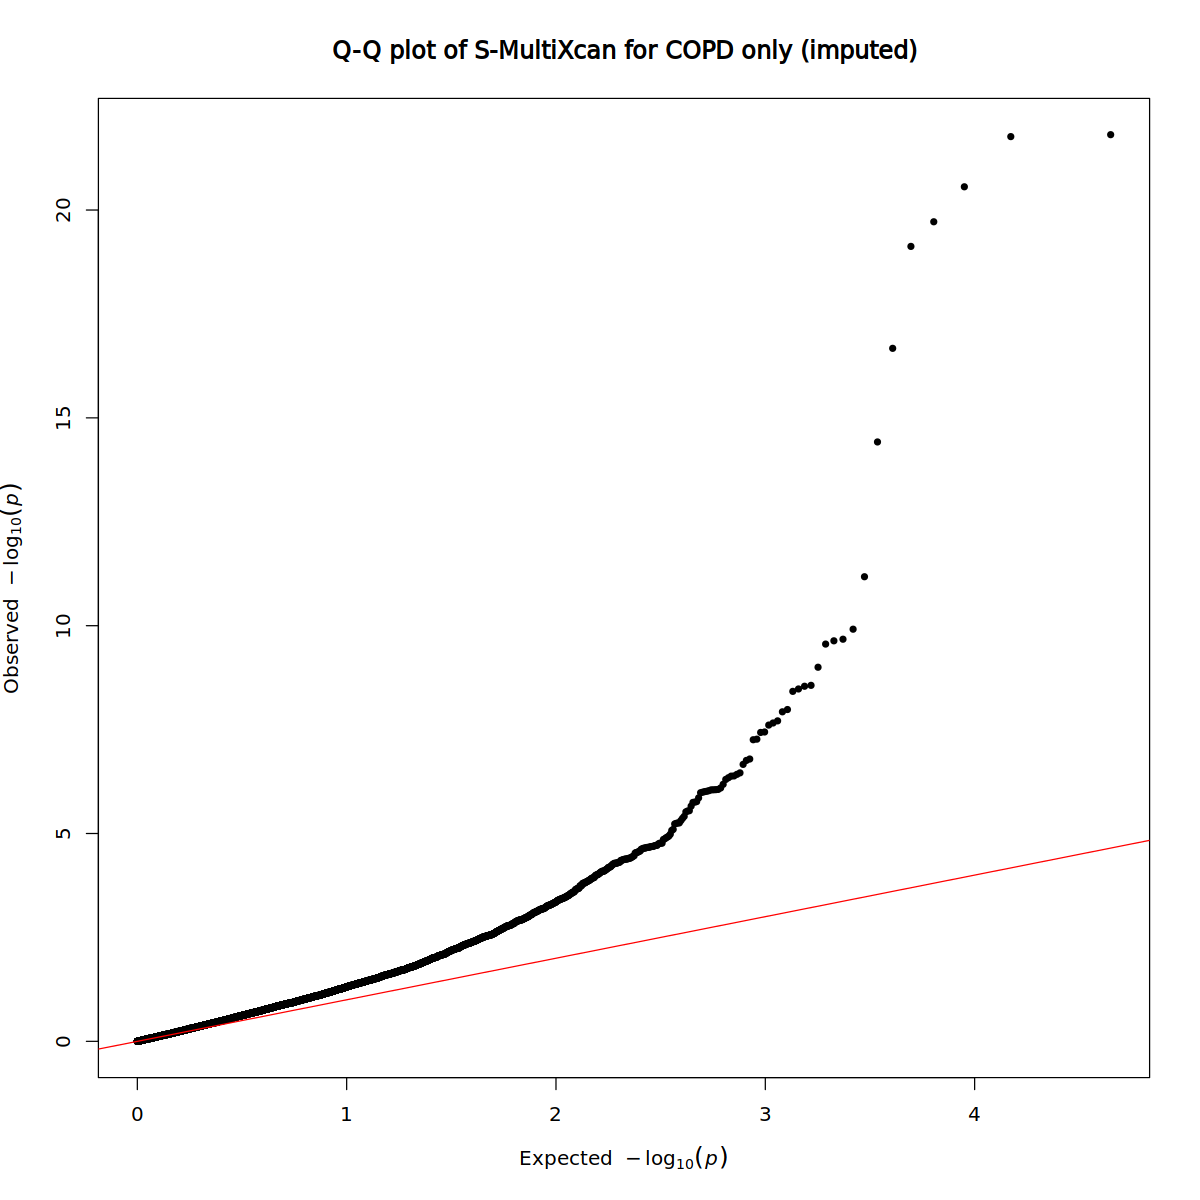

In [27]:
options(repr.plot.width = 10, repr.plot.height = 10)

qq(twas$pvalue, main = paste0("Q-Q plot of S-MultiXcan for ", gwas_title))

# Asthma-COPD Overlap Syndrome (ACOS)

In [28]:
gwas_title <- "ACOS (imputed)"

## S-PrediXcan

### Load data

In [29]:
twas <- as.data.frame(read_csv(file.path(SPREDIXCAN_DIR, "GWAS_ACO_GLM_SNPs_info0.7-gtex_v8-mashr-Whole_Blood.csv")))

Rows: 12184 Columns: 14
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): gene, gene_name
dbl (8): zscore, pvalue, var_g, n_snps_used, n_snps_in_cov, n_snps_in_model,...
lgl (4): effect_size, pred_perf_r2, pred_perf_pval, pred_perf_qval

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [30]:
dim(twas)

[1] 12184    14

In [31]:
head(twas)

,gene,gene_name,zscore,effect_size,pvalue,var_g,pred_perf_r2,pred_perf_pval,pred_perf_qval,n_snps_used,n_snps_in_cov,n_snps_in_model,best_gwas_p,largest_weight
,<chr>,<chr>,<dbl>,<lgl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000179344.16,HLA-DQB1,-11.510273,NA,1.171072e-30,0.28375913,NA,NA,NA,3,3,3,9.769960e-28,0.7723323
2,ENSG00000232629.8,HLA-DQB2,10.404492,NA,2.365140e-25,1.36360132,NA,NA,NA,2,3,3,3.571353e-25,0.9720326
3,ENSG00000237541.3,HLA-DQA2,7.419567,NA,1.175039e-13,0.11880279,NA,NA,NA,2,4,4,7.045886e-16,0.4865744
4,ENSG00000172057.9,ORMDL3,7.301199,NA,2.852135e-13,0.13741437,NA,NA,NA,2,2,2,7.949287e-15,0.3977521
5,ENSG00000224389.8,C4B,7.229532,NA,4.846619e-13,0.19807481,NA,NA,NA,2,2,2,6.175598e-12,1.1014810
6,ENSG00000196735.11,HLA-DQA1,-7.106145,NA,1.193286e-12,0.02677445,NA,NA,NA,2,3,3,5.641805e-12,0.3833632


### QQ-plot

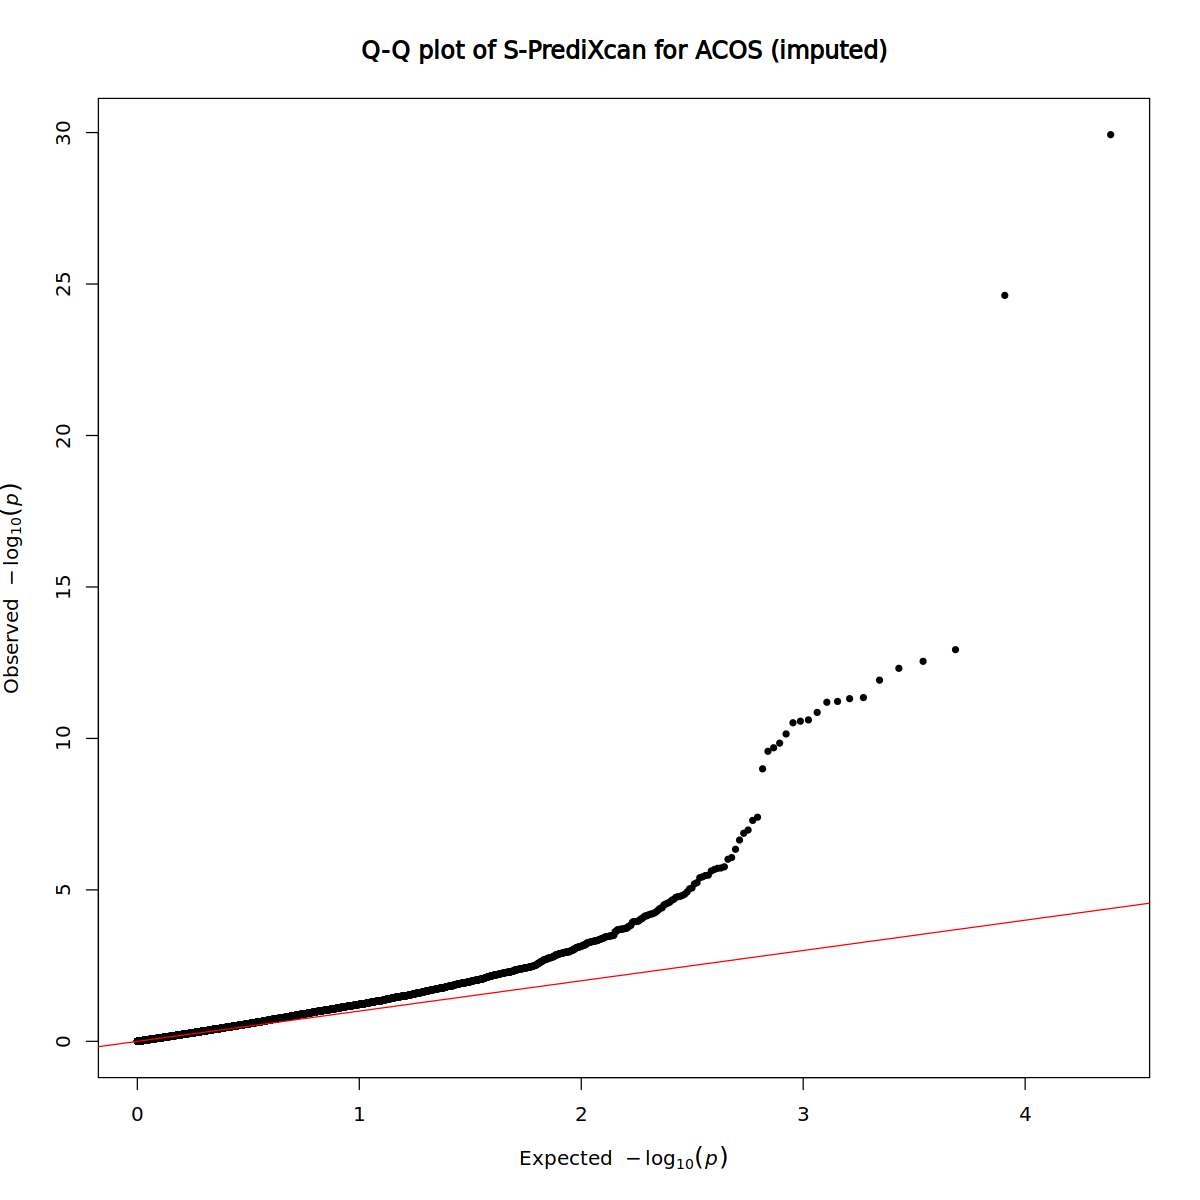

In [32]:
options(repr.plot.width = 10, repr.plot.height = 10)

qq(twas$pvalue, main = paste0("Q-Q plot of S-PrediXcan for ", gwas_title))

## S-MultiXcan

### Load data

In [33]:
twas <- as.data.frame(read_table(file.path(SMULTIXCAN_DIR, "GWAS_ACO_GLM_SNPs_info0.7-gtex_v8-mashr-smultixcan.txt")))


── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  gene = col_character(),
  gene_name = col_character(),
  pvalue = col_double(),
  n = col_double(),
  n_indep = col_double(),
  p_i_best = col_double(),
  t_i_best = col_character(),
  p_i_worst = col_double(),
  t_i_worst = col_character(),
  eigen_max = col_double(),
  eigen_min = col_double(),
  eigen_min_kept = col_double(),
  z_min = col_double(),
  z_max = col_double(),
  z_mean = col_double(),
  z_sd = col_double(),
  tmi = col_double(),
  status = col_double()
)



In [34]:
dim(twas)

[1] 22321    18

In [35]:
head(twas)

,gene,gene_name,pvalue,n,n_indep,p_i_best,t_i_best,p_i_worst,t_i_worst,eigen_max,eigen_min,eigen_min_kept,z_min,z_max,z_mean,z_sd,tmi,status
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000237541.3,HLA-DQA2,1.692207e-33,45,5,4.191940e-33,Liver,0.000226044,Brain_Putamen_basal_ganglia,29.469983,2.851292e-15,1.1347679,3.687977,11.986304,8.0842186,1.641249,5,0
2,ENSG00000179344.16,HLA-DQB1,5.343156e-29,49,3,4.216780e-36,Brain_Nucleus_accumbens_basal_ganglia,0.004164294,Cells_Cultured_fibroblasts,43.187142,4.265176e-15,1.4925449,-12.545326,-2.865441,-10.1816352,1.375576,3,0
3,ENSG00000196735.11,HLA-DQA1,1.919708e-28,44,6,2.858217e-31,Colon_Transverse,0.491725010,Brain_Hippocampus,28.204735,2.729601e-15,0.9619905,-11.631267,7.325217,-7.3273160,4.235066,6,0
4,ENSG00000204290.10,BTNL2,1.414254e-27,21,10,5.427037e-18,Brain_Cerebellum,0.859539320,Brain_Hippocampus,6.638123,3.961112e-17,0.2530003,-8.644017,4.644585,-0.4653209,4.224798,10,0
5,ENSG00000232629.8,HLA-DQB2,1.371715e-24,41,3,3.379941e-30,Adipose_Subcutaneous,0.240848049,Skin_Sun_Exposed_Lower_leg,31.641709,3.098713e-15,2.4323223,1.172870,11.418506,8.6220052,2.811247,3,0
6,ENSG00000196126.11,HLA-DRB1,3.737973e-23,30,7,2.308368e-13,Spleen,0.416881293,Lung,15.533256,1.498518e-15,0.5618739,-6.748695,7.329602,-2.8008473,3.157541,7,0


### QQ-plot

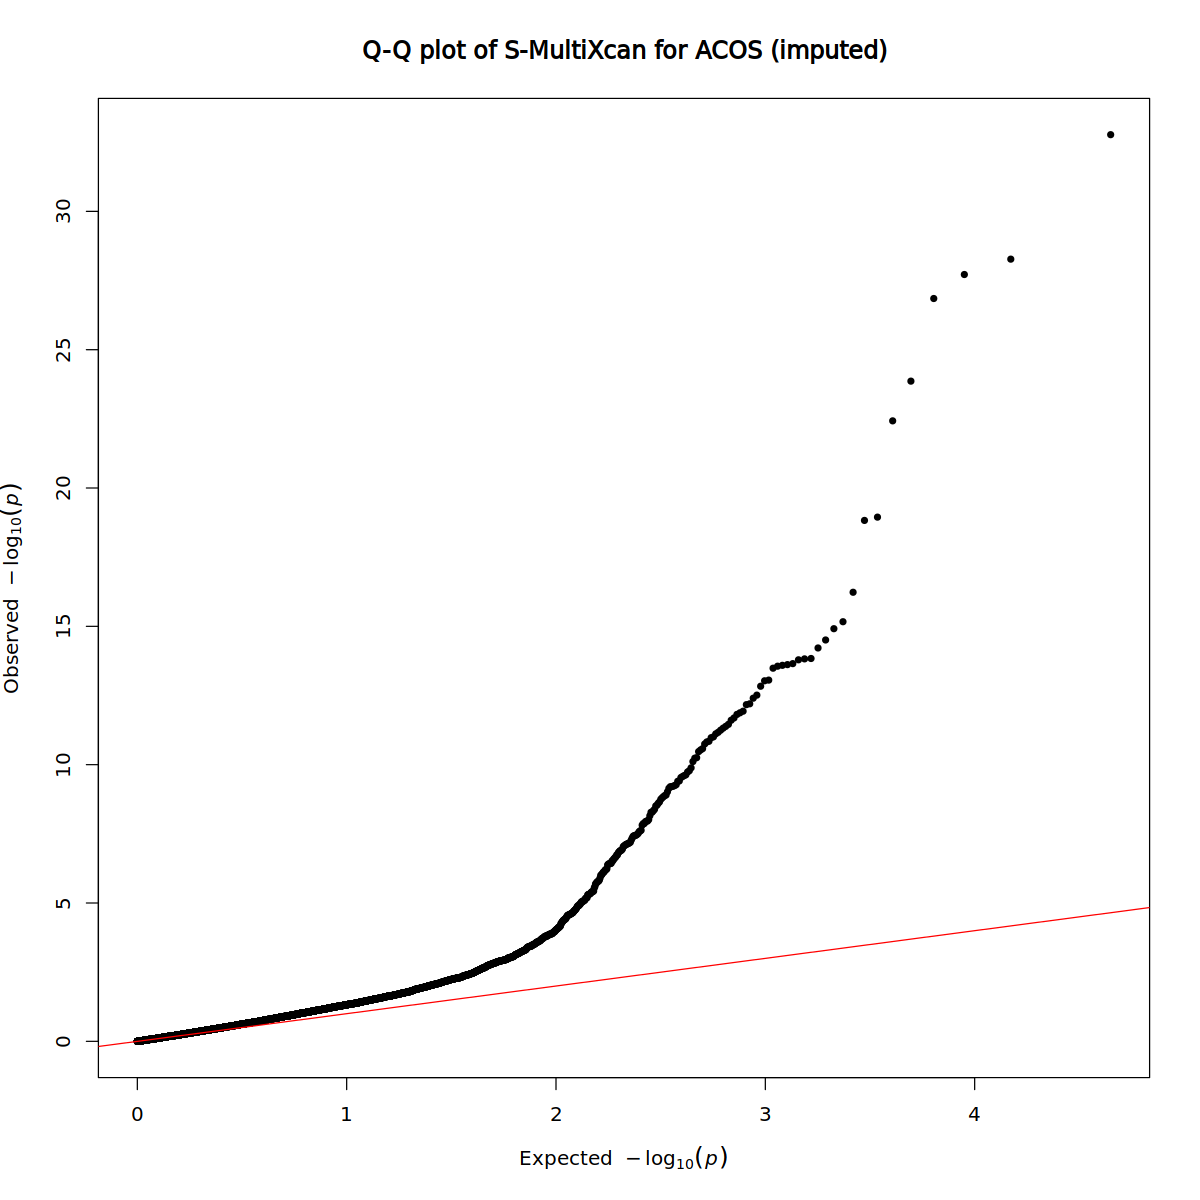

In [36]:
options(repr.plot.width = 10, repr.plot.height = 10)

qq(twas$pvalue, main = paste0("Q-Q plot of S-MultiXcan for ", gwas_title))